# 项目背景及要求

优衣库（英文名称：UNIQLO，日文假名发音：ユニクロ），为日本迅销公司的核心品牌,建立于1984年，当年是一家销售西服的小服装店，现已成为国际知名服装品牌。优衣库现任董事长兼总经理柳井正在日本首次引进了大卖场式的服装销售方式，通过独特的商品策划、开发和销售体系来实现店铺运作的低成本化，由此引发了优衣库的热卖潮。

优衣库(Uniqlo) 的内在涵义是指通过摒弃了不必要装潢装饰的仓储型店铺，采用超市型的自助购物方式，以合理可信的价格提供顾客希望的商品价廉物美的休闲装“UNIQLO”是Unique Clothing Warehouse的缩写，意为消费者提供“低价良品、品质保证”的经营理念，在日本经济低迷时期取得了惊人的业绩。

根据提供的数据，利用Python进行可视化，并回答如下问题：


-     整体销售情况随着时间的变化是怎样的？
-    不同产品的销售情况是怎样的？顾客偏爱哪一种购买方式？
- 销售额和产品成本之间的关系怎么样？


# 项目代码

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
#windows
plt.rcParams['font.sans-serif'] = ['simhei']

In [ ]:
#os
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

## 读取数据

In [4]:
df_origin = pd.read_csv('./data/优衣库数据.csv')

伪代码：
-

In [5]:
df_origin.shape

(22293, 12)

In [6]:
df_origin.columns 

Index(['store_id', 'city', 'channel', 'gender_group', 'age_group', 'wkd_ind',
       'product', 'customer', 'revenue', 'order', 'quant', 'unit_cost'],
      dtype='object')

In [7]:
df_origin.head()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9


## EDA

In [8]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22293 entries, 0 to 22292
Data columns (total 12 columns):
store_id        22293 non-null int64
city            22293 non-null object
channel         22293 non-null object
gender_group    22293 non-null object
age_group       22293 non-null object
wkd_ind         22293 non-null object
product         22293 non-null object
customer        22293 non-null int64
revenue         22293 non-null float64
order           22293 non-null int64
quant           22293 non-null int64
unit_cost       22293 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 2.0+ MB


In [9]:
df_origin.describe(include='all')

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost
count,22293.000000,22293,22293,22293,22293,22293,22293,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000
unique,NaN,10,2,3,11,2,9,NaN,NaN,NaN,NaN,NaN
top,NaN,深圳,线下,Female,30-34,Weekday,T恤,NaN,NaN,NaN,NaN,NaN
freq,NaN,4364,18403,14208,4426,12465,10610,NaN,NaN,NaN,NaN,NaN
mean,335.391558,NaN,NaN,NaN,NaN,NaN,NaN,1.629480,159.531371,1.651998,1.858072,46.124658
std,230.236167,NaN,NaN,NaN,NaN,NaN,NaN,1.785605,276.254066,1.861480,2.347301,19.124347
min,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.660000,1.000000,1.000000,9.000000
25%,142.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,64.000000,1.000000,1.000000,49.000000
50%,315.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,99.000000,1.000000,1.000000,49.000000
75%,480.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,175.000000,2.000000,2.000000,49.000000


- 处理异常值

营收存在异常值。

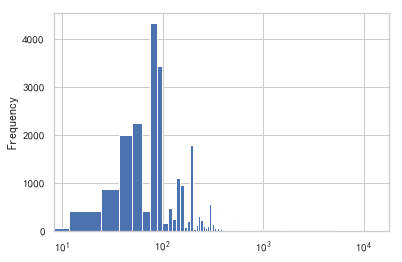

In [10]:
df_origin['revenue'].plot(kind='hist',logx=True,bins=1000);

In [11]:
df_origin[df_origin['revenue']<0]

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost
20049,91,武汉,线上,Female,55-59,Weekday,运动,1,-0.66,1,2,49


In [12]:
df_clean = df_origin.copy()

In [13]:
#删除小于零的这条
drop_idx = df_clean[df_clean['revenue']<0].index
df_clean = df_clean.drop(drop_idx)

- store_id应该是str类型

In [14]:
df_clean['store_id'] = df_clean['store_id'].astype(str)

- 增加计算字段
    - 人均订单量`order/customer`
    - 人均购买商品量`quant/customer`
    - 订单平均包含商品量`quant/order`
    - 商品平均销售额`revenue/quant`
    - 人均消费额`revenue/customer`
    - 利润`商品平均销售额-unit_cost`

In [15]:
df_clean['uni_order_num'] = df_clean['order']/df_clean['customer']
df_clean['uni_quant_num'] = df_clean['quant']/df_clean['customer']
df_clean['uni_quant_of_order'] = df_clean['quant']/df_clean['order']
df_clean['uni_revenue_of_product'] = df_clean['revenue']/df_clean['quant']
df_clean['uni_revenue_of_customer'] = df_clean['revenue']/df_clean['customer']
df_clean['margin'] = df_clean['uni_revenue_of_product'] - df_clean['unit_cost']

数据概况：
- 数据包含7列分类变量和10列数值变量；
- 各变量分布情况如下：

In [16]:
df_clean.describe(include='all')

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,uni_order_num,uni_quant_num,uni_quant_of_order,uni_revenue_of_product,uni_revenue_of_customer,margin
count,22292,22292,22292,22292,22292,22292,22292,22292.000000,22292.000000,22292.000000,22292.000000,22292.000000,22292.000000,22292.000000,22292.000000,22292.000000,22292.000000,22292.000000
unique,64,10,2,3,11,2,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,207,深圳,线下,Female,30-34,Weekday,T恤,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,610,4364,18403,14207,4426,12464,10610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.629508,159.538557,1.652028,1.858066,46.124529,1.011537,1.132065,1.114455,84.269491,93.254588,38.144962
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.785640,276.258179,1.861517,2.347353,19.124766,0.111974,0.738713,0.443968,46.317936,76.634104,40.265440
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-99.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,64.000000,1.000000,1.000000,49.000000,1.000000,1.000000,1.000000,56.000000,59.000000,14.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,99.000000,1.000000,1.000000,49.000000,1.000000,1.000000,1.000000,79.000000,79.000000,30.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,175.000000,2.000000,2.000000,49.000000,1.000000,1.000000,1.000000,99.000000,99.000000,50.000000


### 分类变量

In [17]:
#对city进行分类统计
value_count_df = pd.DataFrame(df_clean['city'].value_counts()).reset_index()

In [19]:
#更改列名
value_count_df = value_count_df.rename(columns={'index':'city','city':'count'})

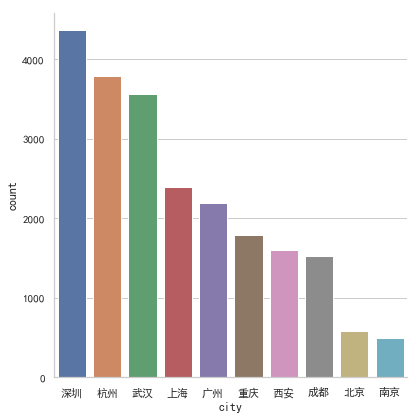

In [30]:
#绘图
sns.catplot(x='city', y="count",data=value_count_df,height=6, kind="bar");

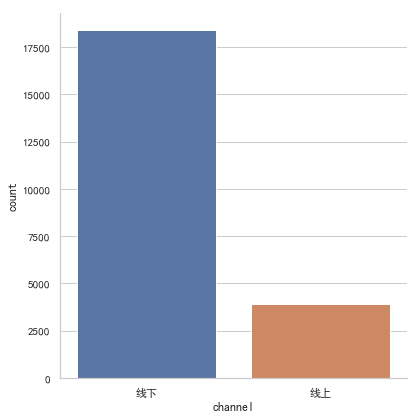

In [31]:
#对city进行分类统计
value_count_df = pd.DataFrame(df_clean['channel'].value_counts()).reset_index()
#更改列名
value_count_df = value_count_df.rename(columns={'index':'channel','channel':'count'})
#绘图
sns.catplot(x='channel', y="count",data=value_count_df,height=6, kind="bar");

！注意

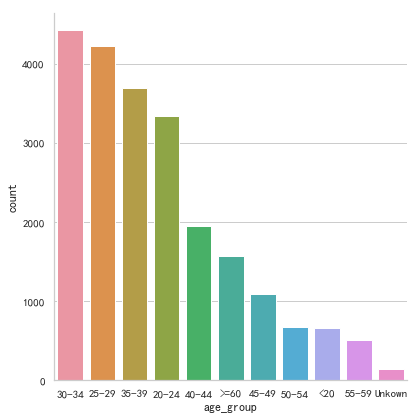

In [32]:
#对city进行分类统计
value_count_df = pd.DataFrame(df_clean['age_group'].value_counts()).reset_index()
#更改列名
value_count_df = value_count_df.rename(columns={'index':'age_group','age_group':'count'})
#绘图
sns.catplot(x='age_group', y="count",data=value_count_df,height=6, kind="bar");

搜索： seaborn catplot x label orders

In [33]:
age_orders = ['<20','20-24','25-29',  '30-34','35-39',  '40-44','45-49', '50-54','55-59','>=60', 'Unkown']

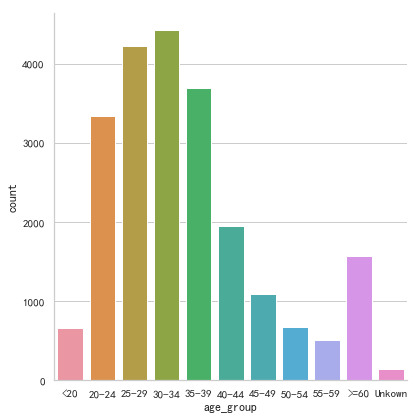

In [34]:
#对city进行分类统计
value_count_df = pd.DataFrame(df_clean['age_group'].value_counts()).reset_index()
#更改列名
value_count_df = value_count_df.rename(columns={'index':'age_group','age_group':'count'})
#绘图
sns.catplot(x='age_group', y="count",data=value_count_df,height=6, kind="bar",order=age_orders);

结论：
- 数据主要集中在深圳、杭州、武汉三所城市
- 选择线下购买的客户远大于线上购买

- 客户的年龄段主要集中在20-40岁之间，此外，还有一些用户（60岁以上）可疑填写不实信息


### 数值变量

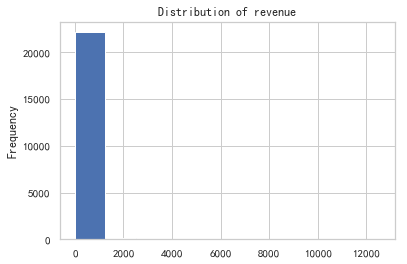

In [36]:
df_clean['revenue'].plot(kind='hist',title='Distribution of revenue');

In [39]:
df_clean['revenue'].describe()

count    22292.000000
mean       159.538557
std        276.258179
min          0.000000
25%         64.000000
50%         99.000000
75%        175.000000
max      12538.000000
Name: revenue, dtype: float64

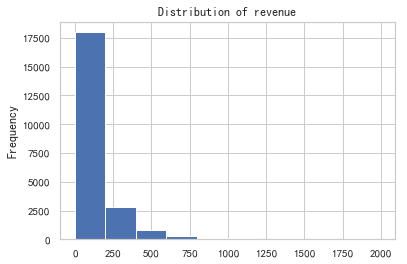

In [42]:
df_clean[df_clean['revenue']< 2000]['revenue'].plot(kind='hist',title='Distribution of revenue');

## 项目问题

### 问题一：整体销售情况随着时间的变化是怎样的？

数据中涉及到时间的只有变量`wkd_ind`，该变量中只包含了`weekday`和`weekend`两类变量，所以我们可以从渠道、性别、顾客数量、销售额、销售产品数量及利润等维度对其进行对比分析及可视化。

#### 类别变量

In [57]:
df_clean['count'] = 1

In [58]:
tmp = df_clean.groupby(['channel','wkd_ind'])['count'].count()

In [63]:
tmp = tmp.reset_index()

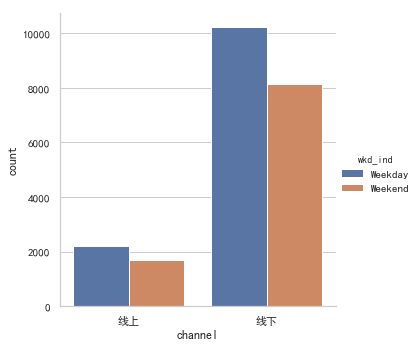

In [66]:
sns.catplot(x='channel',y='count',hue='wkd_ind',kind='bar',data=tmp);

不管是周内还是周末，选择线上和线下的客户比例相当。

- 男女是否有区别

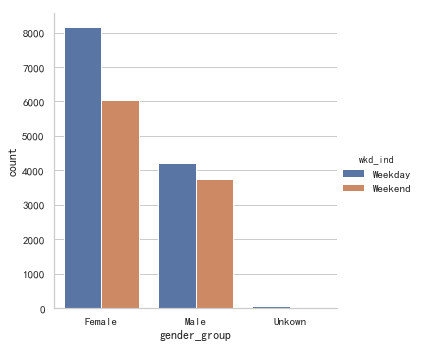

In [68]:
tmp = df_clean.groupby(['gender_group','wkd_ind'])['count'].count()
tmp = tmp.reset_index()
sns.catplot(x='gender_group',y='count',hue='wkd_ind',kind='bar',data=tmp);

相比于女生，男生有稍高的比例选择在周末购买。

除此之外，还可以探索：
- 不同年龄段的影响
- 产品等

#### 数值变量

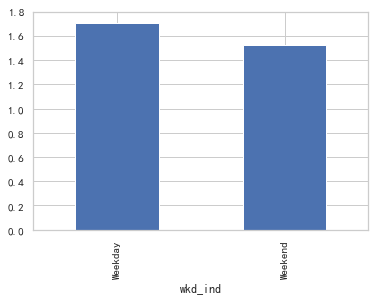

In [70]:
df_clean.groupby('wkd_ind')['customer'].mean().plot(kind='bar');

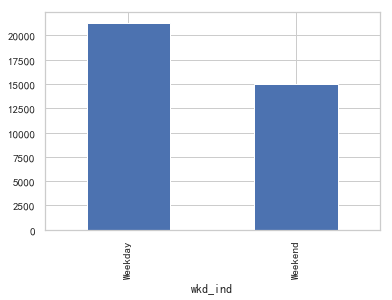

In [71]:
df_clean.groupby('wkd_ind')['customer'].sum().plot(kind='bar');

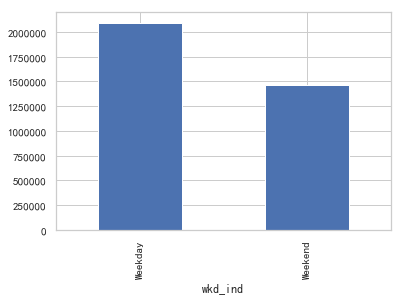

In [72]:
df_clean.groupby('wkd_ind')['revenue'].sum().plot(kind='bar');

描述：  
- 就顾客数量来看，xxxxx
- 就销售额来看，xxxxx


除此之外，还可以探索：  
'order', 'quant', 'unit_cost','uni_order_num', 'uni_quant_num', 'uni_quant_of_order','uni_revenue_of_product',   
'uni_revenue_of_customer', 'margin'等数值型

### 问题二：不同产品的销售情况是怎样的？顾客偏爱哪一种购买方式？

- 不同产品即指product字段中不同类别的产品，销售情况即为销售额revenue，可生成柱状图进行可视化
- 购买方式只有channel是线上还是线下这一个指标，而顾客可以从不同性别gender_group、年龄段age_group、城市city三个维度进行分解，因此本问即为探究不同性别、年龄段和城市的顾客对线上、线下两种购买方式的偏好，可生成柱状图进行可视化的呈现

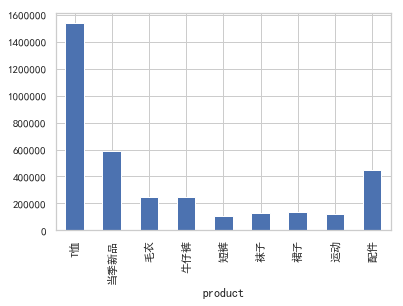

In [74]:
df_clean.groupby('product')['revenue'].sum().plot(kind='bar');

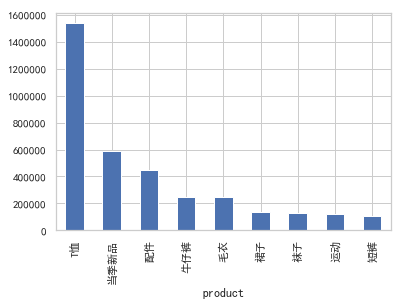

In [73]:
#总销售额
df_clean.groupby('product')['revenue'].sum().sort_values(ascending=False).plot(kind='bar');

- 销售额等变量的对比

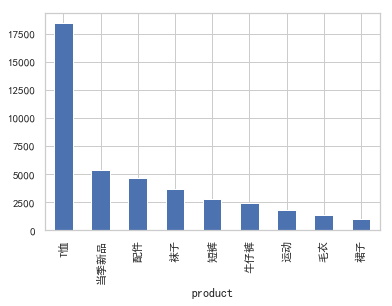

In [75]:
#总销售数量
df_clean.groupby('product')['quant'].sum().sort_values(ascending=False).plot(kind='bar');

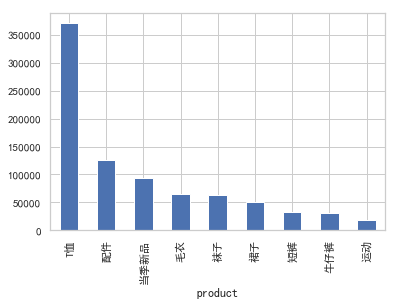

In [76]:
#利润
df_clean.groupby('product')['margin'].sum().sort_values(ascending=False).plot(kind='bar');

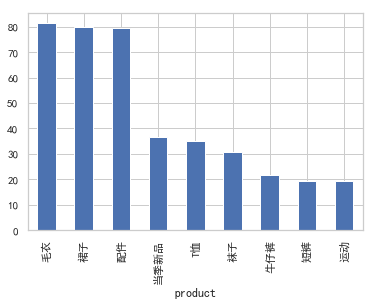

In [77]:
#利润均值
df_clean.groupby('product')['margin'].mean().sort_values(ascending=False).plot(kind='bar');

- T恤占绝对领先地位，在销售额、销售数量和利润上都遥遥领先；当季新品和配件占据第二、三名，其中当季新品的销售额和数量较配件高，但利润较配件低；
- 毛衣、裙子和配件的平均利润最高，都在80元左右。

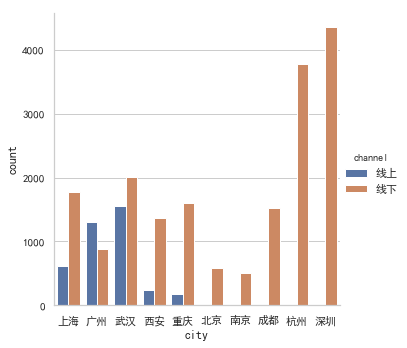

In [83]:
tmp = df_clean.groupby(['channel','city'])['count'].count()
tmp = tmp.reset_index()
sns.catplot(x='city',y='count',hue='channel',kind='bar',data=tmp);

同样，可以探索：
- 性别
- 年龄

- 广州的顾客更偏爱在线上购买，上海、西安和重庆也有一定的线上购买比例，其余城市均为在线下购买；
- 不同性别在选择购买渠道时xxxx；
- 就年龄段来看，xxxx

### 问题三：销售额和产品成本之间的关系怎么样？

-   思路一：单件产品销售额-成本为利润margin，margin是如何分布的？是否存在亏本销售的产品？
-    思路二：探究实际销售额和产品成本之间的关系，即为求它们之间的相关，若成正相关，则产品成本越高，销售额越高，或许为高端商品；若成负相关，则成本越低，销售额越高，为薄利多销的模式。
    - 还可以拆分得更细，探究不同城市和门店中成本和销售额的相关性。

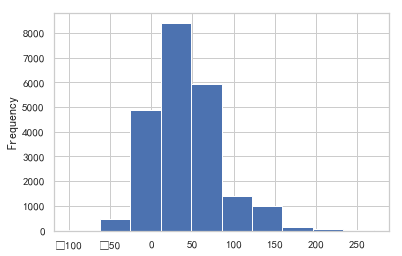

In [85]:
df_clean['margin'].plot(kind='hist');

In [86]:
plt.rcParams['axes.unicode_minus']=False

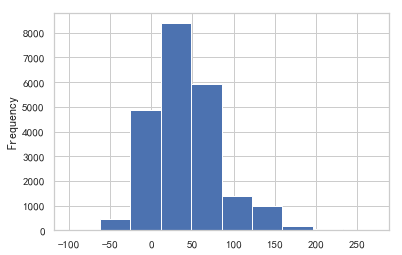

In [87]:
df_clean['margin'].plot(kind='hist');

- 利润主要集中在0-75元之间；
- 存在一定量的亏本（即利润小于0）的产品。

In [88]:
#聚焦亏本产品
df_loss = df_clean[df_clean['margin']<0]

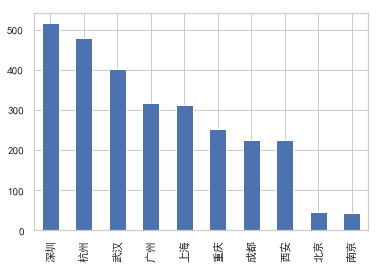

In [89]:
#城市
df_loss['city'].value_counts().plot(kind='bar');

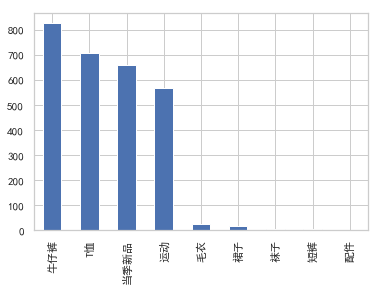

In [91]:
#渠道
df_loss['product'].value_counts().plot(kind='bar');

可以看出：
- 成都、广州、重庆和西安都有14%左右的亏本商品
- 线下销售xxx线上渠道
- 周内销售xxx周末
- 牛仔裤和运动类是亏损数量最多的商品

In [92]:
df_clean[['uni_revenue_of_product','unit_cost','margin']].corr()

,uni_revenue_of_product,unit_cost,margin
uni_revenue_of_product,1.000000,0.502248,0.911764
unit_cost,0.502248,1.000000,0.102776
margin,0.911764,0.102776,1.000000


整体来看，单位商品的销售额与成本之间是成正相关的，相关系数为0.5；单位商品的销售额与利润成强正相关，相关系数为0.91；但商品的成本与利润的相关性很低，仅为0.1.

# 总结

通篇我们使用了10座城市，共计22292条数据进行分析，得出以下结论：

- 数据主要集中在深圳、杭州、武汉三所城市
- 选择线下购买的客户远大于线上购买
- 性别xxxx
- 客户的年龄段xxx
- 客户选择周内购买xxxx周末购买总次数
- xxx是最畅销的产品


## 问题一：整体销售情况随着时间的变化是怎样的？

- 不管是周内还是周末，xxxx
- 相比于女生，男生有xxxx在周末购买
- 年龄xxxx
- 就总量来看xxx
- 就均值来看xxxx


销售建议：
- xxxx

## 问题二：不同产品的销售情况是怎样的？顾客偏爱哪一种购买方式？
- xxxxx

销售建议：
- xxxx

## 问题三：销售额和产品成本之间的关系怎么样？
- xxxxx
销售建议：
- xxxx